<a href="https://colab.research.google.com/github/Hyewon-Git/2021_HUFS_NLP/blob/main/%ED%98%9C%EC%9B%90_NLP_01_02_simple_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [ ]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

In [ ]:
id_to_label[2]

'긍정'

In [ ]:
sentences

['나는 오늘 기분이 좋아', '나는 오늘 우울해']

In [ ]:
labels

[[1, 1, 1, 2], [1, 1, 0]]

## Vocabulary

In [ ]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [ ]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [ ]:
########### 고유한 번호 부여 다시 !!!!!!!***************

In [ ]:
# 각 단어별 고유한 번호 부여 ---> 글자에 순서를
word_to_id = {'[PAD]': 0, '[UNK]': 1}  # PAD 길이를 조절할때, UNK vocab에 없는 단어
for word in words:
    print(words)
    print(word)
    print(len(word_to_id))
    word_to_id[word] = len(word_to_id)
word_to_id

['나는', '오늘', '기분이', '좋아', '우울해']
나는
2
['나는', '오늘', '기분이', '좋아', '우울해']
오늘
3
['나는', '오늘', '기분이', '좋아', '우울해']
기분이
4
['나는', '오늘', '기분이', '좋아', '우울해']
좋아
5
['나는', '오늘', '기분이', '좋아', '우울해']
우울해
6


{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [ ]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [ ]:
# 학습용 입력 데이터 생성 : 단어를 순서 숫자로 바꿧으 그 숫자로 사용
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4) >> 문장의 최대길이로 동일하게바꿔줌
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [ ]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs.shape

(2, 4)

In [ ]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [ ]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [ ]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

In [ ]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq) ( 베치사이즈 , 문장길이)
    # **차원도 생각해줘야함!!

    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

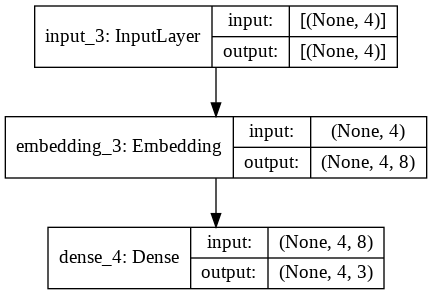

In [ ]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)

# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 모델링

In [ ]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)  # n_vocab, d_model
hidden = embedding(train_inputs)
train_inputs.shape, hidden

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[ 0.04352864,  0.0434214 ,  0.03924635, -0.01627012,
          -0.01530019, -0.01223241, -0.03230556,  0.02161647],
         [-0.01383436, -0.02792847,  0.03936824,  0.00869938,
           0.04843737, -0.00194047,  0.00086018, -0.0270681 ],
         [ 0.04238862,  0.04491439, -0.04137973, -0.0203077 ,
          -0.01039354,  0.0423548 ,  0.0163249 ,  0.03064277],
         [-0.04215628, -0.02907467, -0.01160701,  0.02399028,
           0.00956599,  0.00759455,  0.04401958, -0.03787681]],
 
        [[ 0.04352864,  0.0434214 ,  0.03924635, -0.01627012,
          -0.01530019, -0.01223241, -0.03230556,  0.02161647],
         [-0.01383436, -0.02792847,  0.03936824,  0.00869938,
           0.04843737, -0.00194047,  0.00086018, -0.0270681 ],
         [-0.04068855, -0.03153791, -0.00771628,  0.00484217,
          -0.04373152,  0.01521878,  0.00392642, -0.01863185],
         [ 0.03051622, -0.04800776, -0.03728906,  0.02969402,


In [ ]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.32624155, 0.34840566, 0.3253528 ],
        [0.33729583, 0.32836634, 0.33433786],
        [0.32618833, 0.3486009 , 0.32521078],
        [0.34081224, 0.32416335, 0.33502445]],

       [[0.32624155, 0.34840566, 0.3253528 ],
        [0.33729583, 0.32836634, 0.33433786],
        [0.33740988, 0.32303646, 0.33955368],
        [0.34120315, 0.31026185, 0.348535  ]]], dtype=float32)>

In [ ]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[ 0.00273551,  0.01840198,  0.00998018],
        [-0.01227024,  0.04181593, -0.02300713],
        [ 0.00872404, -0.05703112,  0.0508039 ],
        [-0.0302583 , -0.00866686, -0.00039163]],

       [[ 0.00273551,  0.01840198,  0.00998018],
        [-0.01227024,  0.04181593, -0.02300713],
        [-0.0168948 , -0.025653  , -0.00061527],
        [ 0.00886697, -0.08473791,  0.00247933]]], dtype=float32)>

In [ ]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[1.0027393 , 1.0185724 , 1.0100302 ],
         [0.9878048 , 1.0427024 , 0.9772556 ],
         [1.0087622 , 0.94456464, 1.0521165 ],
         [0.97019494, 0.9913706 , 0.99960846]],
 
        [[1.0027393 , 1.0185724 , 1.0100302 ],
         [0.9878048 , 1.0427024 , 0.9772556 ],
         [0.98324716, 0.9746733 , 0.999385  ],
         [1.0089064 , 0.918753  , 1.0024824 ]]], dtype=float32),
 array([[[3.031342 ],
         [3.0077627],
         [3.0054436],
         [2.961174 ]],
 
        [[3.031342 ],
         [3.0077627],
         [2.9573054],
         [2.930142 ]]], dtype=float32))

In [ ]:
# 두 결과값 비교
probs = numerator / denominator
probs

array([[[0.33079055, 0.3360137 , 0.33319572],
        [0.32841846, 0.34667045, 0.32491115],
        [0.33564505, 0.3142846 , 0.3500703 ],
        [0.3276386 , 0.33478972, 0.33757168]],

       [[0.33079055, 0.3360137 , 0.33319572],
        [0.32841846, 0.34667045, 0.32491115],
        [0.33248076, 0.32958153, 0.3379377 ],
        [0.34431997, 0.3135524 , 0.3421276 ]]], dtype=float32)

In [ ]:
# dense의 wieght, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[-0.09437722, -0.5812871 , -0.04301834],
        [-0.21644181,  0.12237877,  0.7173317 ],
        [-0.29122585,  0.599255  , -0.1287539 ],
        [-0.49976206, -0.7107413 ,  0.29575628],
        [ 0.25047725,  0.50886065, -0.10771114],
        [-0.28738195, -0.7296002 ,  0.62573904],
        [-0.21132344,  0.0900135 , -0.0270831 ],
        [ 0.60279244,  0.23487514, -0.19884682]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [ ]:
# numpy를 이용한 xW+b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.00273551,  0.01840198,  0.00998018],
        [-0.01227024,  0.04181592, -0.02300713],
        [ 0.00872404, -0.05703112,  0.0508039 ],
        [-0.0302583 , -0.00866686, -0.00039163]],

       [[ 0.00273551,  0.01840198,  0.00998018],
        [-0.01227024,  0.04181592, -0.02300713],
        [-0.0168948 , -0.025653  , -0.00061528],
        [ 0.00886696, -0.08473791,  0.00247933]]], dtype=float32)

## 학습

In [ ]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)



Epoch 1/100
1/1 [==============================] - 1s 565ms/step - loss: 1.0705 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0674 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0643 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0612 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0580 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0549 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0518 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0486 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0454 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0423 - accuracy: 0.8750
Epoch 11/100
1/1 [=========

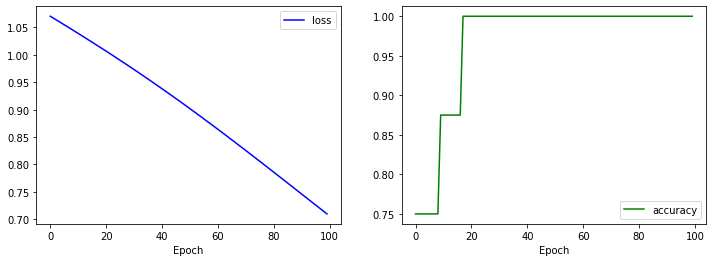

In [ ]:
#모델 결과값 그래프로 
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


## 평가

In [ ]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 137ms/step - loss: 0.7058 - accuracy: 1.0000


[0.7057716846466064, 1.0]

## 예측

In [ ]:
# 추론할 입력
string = '나는 기분이 우울해'

In [ ]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [ ]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4) : 모델링시길이를 맞춰줘야함!
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [ ]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [ ]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.35470042, 0.31926265, 0.32603702],
        [0.32982314, 0.3414013 , 0.32877553],
        [0.34210682, 0.32092878, 0.33696437],
        [0.31482247, 0.32819045, 0.3569871 ]]], dtype=float32)

In [ ]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[0, 1, 0, 2]])